# Multi-linear and polynomial regression

For this homework you are going to create a data pipeline for multi-linear and polynomial regression and compare the results. You will be using the data Airquality dataset from UCI Machine Learning Repository found [here](http://archive.ics.uci.edu/ml/datasets/Air+Quality) to predict the Nitrogen Oxide (NOx(GT)) levels.  Pay attention to what -200 means when you clean the data.

In this homework you will perform the steps required for data exploration and for the last question you will create a data pipeline that will perform all of the these steps.

## 0) Import the required packages, check the data types and number of non-null values for each column

When importing the data you may want to use the "decimal" parameter from read_csv

In [11]:
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

import statsmodels.api as sm
#This will prevent the warnings from showing when you run your code :
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Import the data :
df = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',')

# Imported the data with the decimal = ','
# Displaying that all the Objects except for time are float
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [13]:
# Describing the Data
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


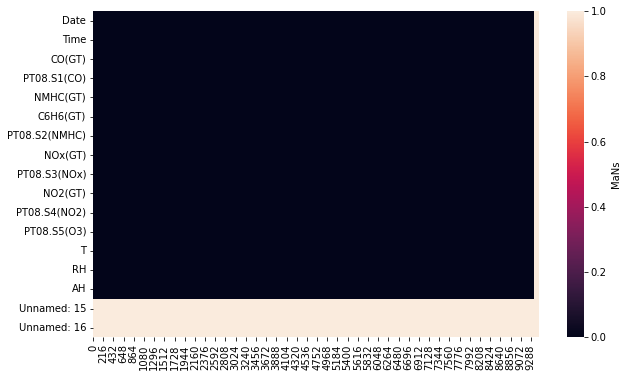

In [14]:
# Displaying the location of all current NaNs
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cbar_kws={'label': 'MaNs'})
plt.show()

In [15]:
#Check if we have any null values :
df.isnull().values.any()

True

In [16]:
# Dropping Rows that consist of all NA's
df.dropna(axis=0, how='all', inplace=True)

# Dropping Columns that consist of all NA's
df.dropna(axis=1, how='all', inplace=True)

# Displaying shape to show change
df.shape

(9357, 15)

In [18]:
# Confirming that there are no NaN's
df.isnull().values.any()

False

## 1) Data cleaning. Drop any unnecessary columns and NaN values from the data. 

## Check that the data that is in the columns are valid inputs. Make the invalid inputs NaNs and remove any columns with a majority of NaN values then replace the values left with the median value for that column.  The Italians use 3,6 to represent the decimal value 3.6 so replace all them comma's with decimal and convert to float.


In [19]:
# Note that the comma versus decimal problem was taken care of during the import of the CSV above.
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [20]:
# Replacing all the -200 values with NaN
df = df.replace(-200, np.nan)
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [21]:
# Confirming that there are now NaN's
df.isnull().values.any()

True

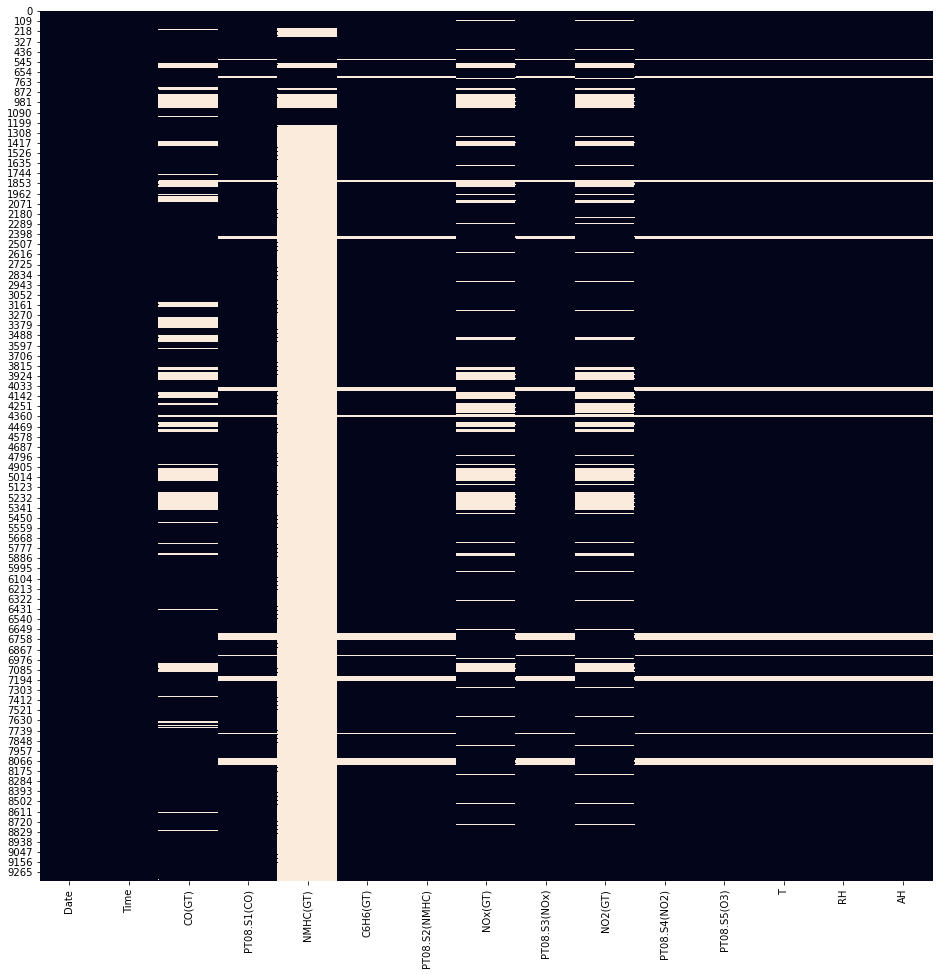

In [22]:
# Displaying Heat map so that you can see the NaN Values
plt.figure(figsize=(16,16))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [23]:
# Looping through the columns to display the percentage that are NaN
print("Percentage of Row that has Nan")
for row in df:
    print(row, round(df[row].isna().sum()/len(df[row])*100,2),"%")

Percentage of Row that has Nan
Date 0.0 %
Time 0.0 %
CO(GT) 17.99 %
PT08.S1(CO) 3.91 %
NMHC(GT) 90.23 %
C6H6(GT) 3.91 %
PT08.S2(NMHC) 3.91 %
NOx(GT) 17.52 %
PT08.S3(NOx) 3.91 %
NO2(GT) 17.55 %
PT08.S4(NO2) 3.91 %
PT08.S5(O3) 3.91 %
T 3.91 %
RH 3.91 %
AH 3.91 %


In [24]:
# Dropping Columns that are primarily made up from NaN's
# For this Purpose we're going to say that over 50% qualifies as primarily
# Dropping the Date Time columns because they should not be used
df.drop(columns=['NMHC(GT)','Time', 'Date'], axis=1, inplace=True)
display(df.shape)
df.head()

(9357, 12)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [25]:
# Showing the Columns with Nans
df.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [31]:
# Replacing the NaN's with the median of the column
# Filling each column's NaNs with the median
df = df.fillna(df.median())

# Displaying that all the Nans are gone
display("Are there NaNs? ", df.isnull().values.any())
display(df.isna().sum())

'Are there NaNs? '

False

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [28]:
# Displaying the New Description to show the median took hold
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.089302,1098.392433,10.009447,937.973923,235.178903,834.339959,112.373303,1456.528054,1020.562894,18.297574,49.248509,1.024352
std,1.323024,212.911465,7.311771,261.625561,195.091025,251.808888,43.948519,339.370072,390.784960,8.658221,16.974949,0.395878
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


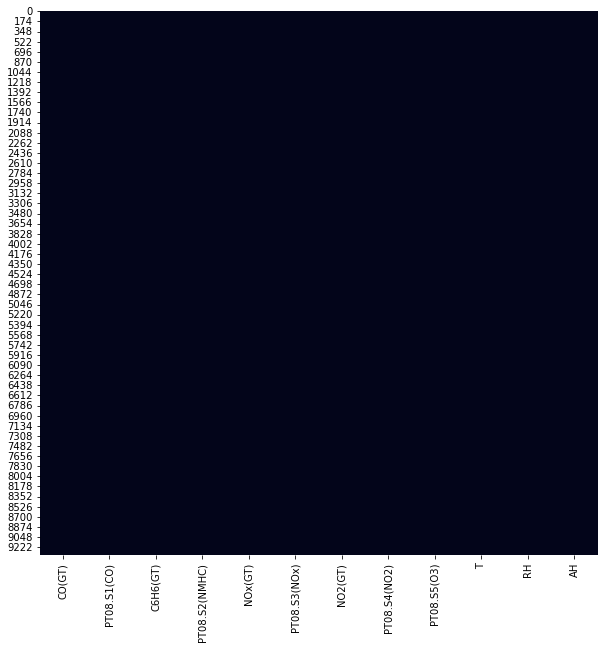

In [17]:
# Displaying that the NaN's have been removed
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## 2) Check the assumptions for a multi-linear model regression. 

### a) Check strong correlation among independent variables (correlation greater than 0.8). If strong correlation exists between variables, remove one of them from the data.

In [66]:
# Splitting the Data up in to Independent variables and dependant
X_all = df.loc[:, df.columns != 'NOx(GT)']
Y_all = df.loc[:, df.columns == 'NOx(GT)']
display(X_all)
display(Y_all)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,11.4,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,12.4,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,9.5,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


,NOx(GT)
0,166.0
1,103.0
2,131.0
3,172.0
4,131.0
...,...
9352,472.0
9353,353.0
9354,293.0
9355,235.0


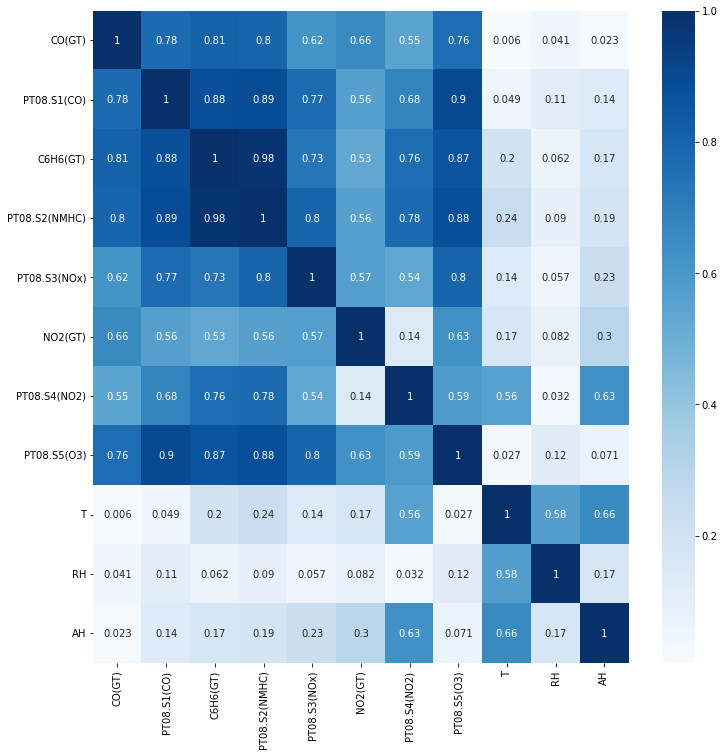

In [67]:
# Displaing a correlation heatmap to identify which variables have correlations that are greater than 0.8
plt.figure(figsize=(12,12))
sns.heatmap(X_all.corr().abs(), cmap="Blues", annot=True)
plt.show()

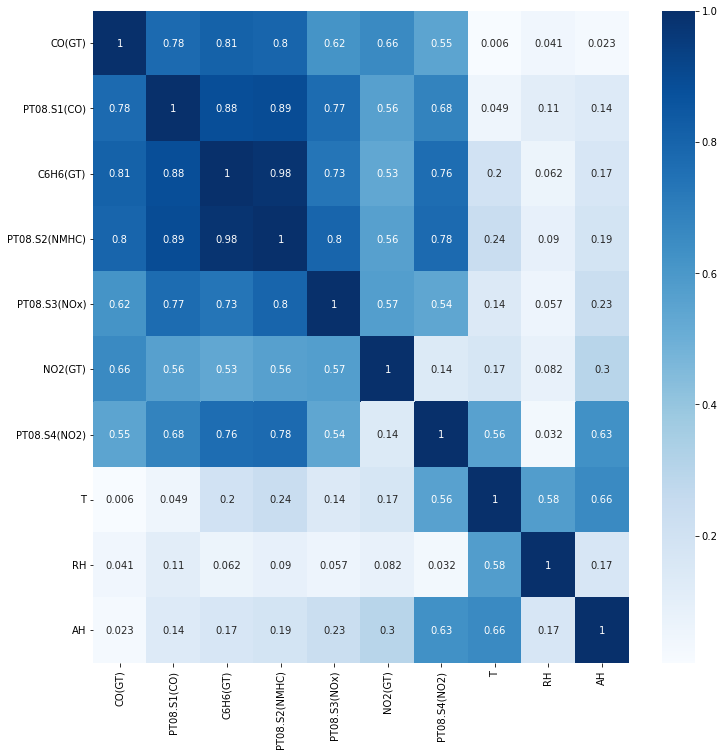

In [68]:
# Removing 'PT08.S5(O3)' Because it has a correlation of .9 with PT08.S1(CO)
X_all.drop(columns=['PT08.S5(O3)'], axis=1, inplace=True)

# Displaying New Heat Map
plt.figure(figsize=(12,12))
sns.heatmap(X_all.corr().abs(), cmap="Blues", annot=True)
plt.show()


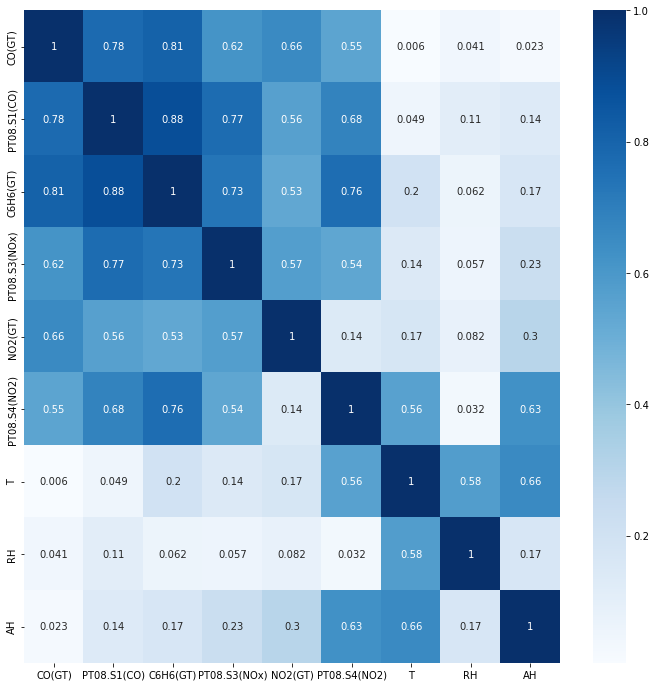

In [69]:
# Removing PT08.S2(NMHC) Because it has a corlation of 0.89 w/ PT08.S1(CO)
X_all.drop(columns=['PT08.S2(NMHC)'], axis=1, inplace=True)

# Displaying new heatmap
plt.figure(figsize=(12,12))
sns.heatmap(X_all.corr().abs(), cmap="Blues", annot=True)
plt.show()

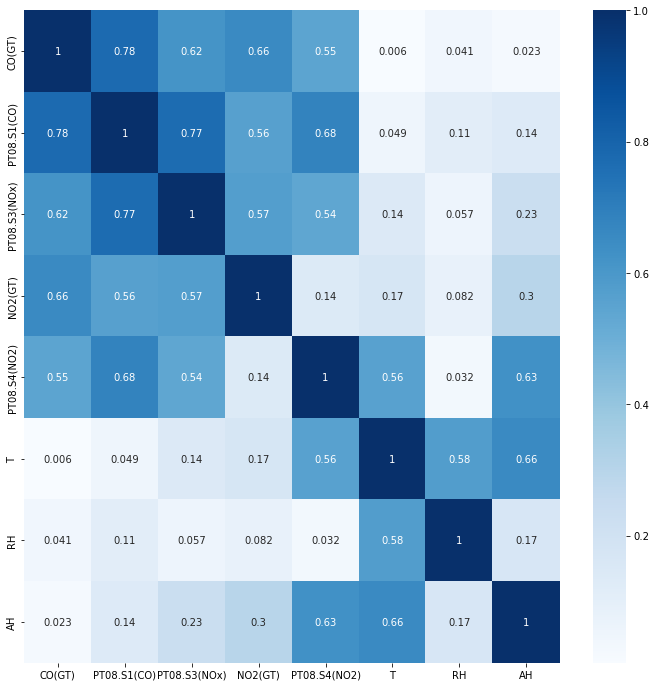

In [70]:
# Removing C6H6(GT) Because it has a correlation of .88 w/ PT08.S1(CO)
X_all.drop(columns=['C6H6(GT)'], axis=1, inplace=True)
plt.figure(figsize=(12,12))
sns.heatmap(X_all.corr().abs(), cmap="Blues", annot=True)
plt.show()

In [62]:
# Creating a list of all the columns for the features
X_cols = X_all.columns
X_cols

Index(['CO(GT)', 'PT08.S1(CO)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T',
       'RH', 'AH'],
      dtype='object')

### b) Check that the relationships between the independent variables left are quasi-linear with the outcome variable. Drop variables that don't satisfy the criteria

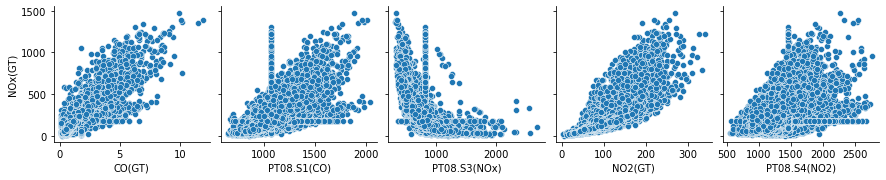

In [71]:
# Checking that the remaining independent variables left are quasi-linear with the out comevariable

sns.pairplot(data=df,y_vars=['NOx(GT)'], x_vars=X_cols)
plt.show()


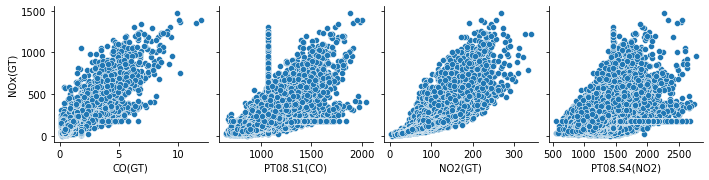

In [72]:
# Deciding to drop T RH and AH PT08.S3(NOx) as the do not look that linear
X_all.drop(columns=['T', 'RH', 'AH', 'PT08.S3(NOx)'], axis=1, inplace=True)

X_cols = X_all.columns
sns.pairplot(data=df,y_vars=['NOx(GT)'], x_vars=X_cols)
plt.show()

## 3) Now that you have selected your independent variables, split the data into 70-30 train test split. 

## Scale the train and test data using RobustScaler and fit a linear model onto the data. 

## Report the values of the intercept,  coefficients and the accurary of the model

In [74]:
#You may use the adjustedR2 function we used in class :
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

# Create a dataframe to store all of our metrics for the models
evaluation = pd.DataFrame({'Model': [],
                           'Root Mean Squared Error (RMSE)': [],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)': [],
                           'R-squared (test)': [],
                           'Adjusted R-squared (test)': []})

In [75]:
# Splitting the Data into 70-30 train test split

# Setting the features to include the columns that were selected from above
features = X_cols

# Creating a RobustScalar
scaler = RobustScaler()

# Scalling the Independent Values
df_scaled = scaler.fit_transform(df[features].values)

# Turning them back into a data frame
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=features)
df_scaled

# Splitting the data into X test, X train, Y train, Y test
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled[features], df['NOx(GT)'], train_size = 0.7, random_state=1)
train_data, test_data = train_test_split(df, train_size = 0.7, random_state=1)
# Creating a regression model
model_1 = linear_model.LinearRegression()

# Fitting the model
model_1.fit(X_train, Y_train)

LinearRegression()

In [76]:
#Let's look at our values for the intercept and the coefficients :
print ("NOx(GT) Test Data: {:.3f}".format(Y_test.mean()))
print('Intercept: {}'.format(model_1.intercept_))
print('Coefficients: {}'.format(model_1.coef_))

NOx(GT) Test Data: 236.245
Intercept: 197.09550157035477
Coefficients: [124.61621349  50.12633606  61.78024859 -73.27621708]


In [77]:
# Printing the accuracy of the test
print("The training score was:", round(model_1.score(X_train, Y_train)*100,2))
print("The testing score was:", round(model_1.score(X_test, Y_test)*100,2))

The training score was: 75.63
The testing score was: 75.49


## 4) Calculate the root mean squared error (RMSE), R-squared (training), Adjusted R-squared (training), R-squared (test), Adjusted R-squared (test). Add these result to the evaluation dataframe.

In [93]:
#Let's calculate the Root Mean Squared Error on the test data
pred = model_1.predict(X_test)

# Calculating the RMSE
rmse = float(format(np.sqrt(metrics.mean_squared_error(Y_test, pred)),'.3f'))
rmse

96.458

In [94]:
# Calculating R-squared value for the training data set :
rtr = float(format(model_1.score(X_train, Y_train),'.3f'))
rtr

0.756

In [95]:
# Calculating the adjusted R-squared value for the training data set :
artr = float(format(adjustedR2(model_1.score(X_train,Y_train), train_data.shape[0],len(features)),'.3f'))
artr

0.756

In [96]:
# Calculating the R-squared value for the test data set :
rte = float(format(model_1.score(X_test,Y_test),'.3f'))
rte

0.755

In [97]:
# Calculating the adjusted R-squared value for the test data set :
arte = float(format(adjustedR2(model_1.score(X_test,Y_test),test_data.shape[0],len(features)),'.3f'))
arte

0.755

In [98]:
# Fitting the R Values into a data Frame
r = evaluation.shape[0]
evaluation.loc[r] = ['Selected Features, Robust Scalar Linear Model',rmse,rtr,artr,rte,arte]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,"Selected Features, Robust Scalar Linear Model",96.458,0.756,0.756,0.755,0.755
1,"Selected Features, Robust Scalar Linear Model",96.458,0.756,0.756,0.755,0.755


## 5) Verify that the errors are normal using a histogram plot

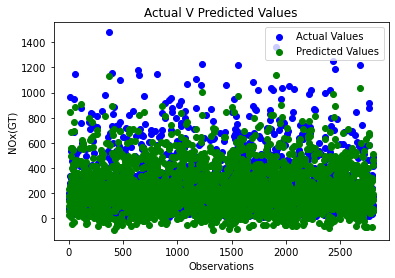

In [92]:
# Creating a scatter plot to look at the Errors
_, ax = plt.subplots()

ax.scatter(x = range(0, Y_test.size), y=Y_test, c='b', label= 'Actual Values')
ax.scatter(x = range(0, pred.size), y=pred, c='g', label= 'Predicted Values')

plt.title('Actual V Predicted Values')
plt.xlabel('Observations')
plt.ylabel('NOx(GT)')
plt.legend()
plt.show()


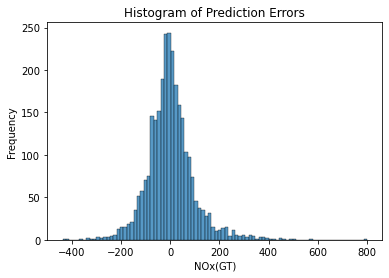

In [99]:
# Calculating the Errors Difference
error_diff  = Y_test - pred

# Plotting the errors difference
sns.histplot(error_diff)
plt.title("Histogram of Prediction Errors")
plt.xlabel("NOx(GT)")
plt.ylabel("Frequency")
plt.show()

The Histogram appears to be displaying a normal distribution.

## 6) Repeat this process for a naive model with all the variables (after the preprocessing was done, data frame you had at the end of question 1). Add the results to the evaluation dataframe.

### Why is there such a difference between the models ? Is our model wrong ?

In [100]:
# Using the df from quesiton 1 with/out the robustscalar()
scaler = RobustScaler()

# Setting up all features w/o the dependent variable
features = df.loc[:, df.columns != 'NOx(GT)'].columns.to_list()
features

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [101]:
# Scalling the Independent Values
df_scaled2 = scaler.fit_transform(df[features].values)
df_scaled2 = pd.DataFrame(df_scaled2, index=df.index, columns=features)

# Splitting the data into X test, X train, Y train, Y test
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled2[features], df['NOx(GT)'], train_size = 0.7, random_state=1)
train_data, test_data = train_test_split(df, train_size = 0.7, random_state=1)
# Creating a regression model
model_2 = linear_model.LinearRegression()

# Fitting the model
model_2.fit(X_train, Y_train)


LinearRegression()

In [102]:
# Printing the accuracy of the test
print("The training score was:", round(model_2.score(X_train, Y_train)*100,2))
print("The testing score was:", round(model_2.score(X_test, Y_test)*100,2))

The training score was: 82.49
The testing score was: 81.97


In [104]:
#Let's calculate the Root Mean Squared Error on the test data
pred2 = model_2.predict(X_test)

# Calculating the RMSE
rmse2 = float(format(np.sqrt(metrics.mean_squared_error(Y_test, pred2)),'.3f'))

# Calculating R-squared value for the training data set :
rtr2 = float(format(model_2.score(X_train, Y_train),'.3f'))

# Calculating the adjusted R-squared value for the training data set :
artr2 = float(format(adjustedR2(model_2.score(X_train,Y_train), train_data.shape[0],len(features)),'.3f'))

# Calculating the R-squared value for the test data set :
rte2 = float(format(model_2.score(X_test,Y_test),'.3f'))

# Calculating the adjusted R-squared value for the test data set :
arte2 = float(format(adjustedR2(model_2.score(X_test,Y_test),test_data.shape[0],len(features)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv2 = float(format(cross_val_score(model_2,X_test,Y_test,cv=5).mean(),'.3f'))

In [105]:
# Fitting the R Values into a data Frame
r = evaluation.shape[0]
evaluation.loc[r] = ['All Features, Robust Scalar Linear Model',rmse2,rtr2,artr2,rte2,arte2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
2,"All Features, Robust Scalar Linear Model",82.726,0.825,0.825,0.820,0.819
0,"Selected Features, Robust Scalar Linear Model",96.458,0.756,0.756,0.755,0.755
1,"Selected Features, Robust Scalar Linear Model",96.458,0.756,0.756,0.755,0.755


This model actually looks to be a bit better with a higher R-Squared. There are more variables and those variables are correlated so there may be over fitting of the model.

## 7) Fit a polynomial regression model of degree 2 on the selected features. Calculate th RMSE, R-Squared training and R-squared test scores to the evaluation dataframe.

### Which model is best ? Based on which metric(s) ?

In [106]:
# Using the df from quesiton 1 with the robustscalar()
polyfeat = PolynomialFeatures(degree=2)

# Setting up all features w/o the dependent variable
features = ['CO(GT)', 'PT08.S1(CO)', 'NO2(GT)', 'PT08.S4(NO2)', 'RH','AH']

# Setting up the training variables
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df['NOx(GT)'], train_size = 0.7, random_state=1)

# Fit our model onto the data:
X_All = polyfeat.fit_transform(df[features])
X_train = polyfeat.fit_transform(X_train)
X_test = polyfeat.fit_transform(X_test)
poly = linear_model.LinearRegression().fit(X_train, Y_train)


In [107]:
# Making the Prediction
pred3 = poly.predict(X_test)

# Calculating the RMSE
rmse3 = float(format(np.sqrt(metrics.mean_squared_error(Y_test, pred3)),'.3f'))

# Calculating R-squared value for the training data set :
rtr3 = float(format(poly.score(X_train, Y_train),'.3f'))

# Calculating the adjusted R-squared value for the training data set :
artr2 = float(format(adjustedR2(poly.score(X_train,Y_train), train_data.shape[0],len(features)),'.3f'))

# Calculating the R-squared value for the test data set :
rte3 = float(format(poly.score(X_test,Y_test),'.3f'))

# Calculating the adjusted R-squared value for the test data set :
arte2 = float(format(adjustedR2(poly.score(X_test,Y_test),test_data.shape[0],len(features)),'.3f'))

#For good measure we'll throw in cross-validation as well :
cv3 = float(format(cross_val_score(poly,X_test,Y_test,cv=5).mean(),'.3f'))

In [108]:
# Fitting the R Values into a data Frame
r = evaluation.shape[0]
evaluation.loc[r] = ['Select Features, Polnomial Feature Linear Model',rmse2,rtr2,artr2,rte2,arte2]
evaluation.sort_values(by = 'R-squared (test)', ascending=False)

,Model,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
2,"All Features, Robust Scalar Linear Model",82.726,0.825,0.825,0.820,0.819
3,"Select Features, Polnomial Feature Linear Model",82.726,0.825,0.844,0.820,0.846
0,"Selected Features, Robust Scalar Linear Model",96.458,0.756,0.756,0.755,0.755
1,"Selected Features, Robust Scalar Linear Model",96.458,0.756,0.756,0.755,0.755


## 8) Implement a preprocessing pipeline (replacing NaN values, removing columns, scaling features, etc...) and a regression pipeline. Then combine the two into a single pipeline. Implement only for the linear regression.

In [162]:
def custom_transformation(df):
    """This Function replaces NaN values, remove columns that have more than 50% NaNs and Scales the Features"""
    # Creating a list of the columns
    x_cols = df.columns.to_list()

    # Replacing all the -200 values with NaN
    df = df.replace(-200, np.nan)

    # Dropping any Rows that have more than 50% NaN Values
    for row in df:
        if float(round(df[row].isna().sum()/len(df[row]),2)) > .5:
            df.drop(row, axis=1, inplace=True)

    # Filling each column's NaNs with the median
    df = df.fillna(df.median())

    # Setting up the the data to get Normalized
    # Creating a Robust Scaler and appling it to the df
    df = RobustScaler().fit_transform(df)
    
    # Turnning df back into a scaled df
    df = pd.DataFrame(df, columns=x_cols)
    
    # # Combining X_all and Y_All
    # df = pd.concat([X_all, Y_all], ignore_index=True, axis=1)
    # df.columns = X_all.columns.to_list()
    return df

# Importing the data set again to make easier
df2 = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',')

# Dropping Rows that consist of all NA's
df2.dropna(axis=0, how='all', inplace=True)

# Dropping Columns that consist of all NA's
df2.dropna(axis=1, how='all', inplace=True)

# Dropping the first two date and time columns
df2.drop(df.columns[[0,1]], axis=1, inplace=True)

# Creating the preprocessor for the pipe line
preprocessor = FunctionTransformer(func=custom_transformation,validate=False)



FunctionTransformer(func=<function custom_transformation at 0x00000217EDC70F70>)

In [165]:

# Creating a dependant variable
target = 'NOx(GT)'

# Splitting the data up into X Y
X_all = df.loc[:, df.columns != target]
Y_all = df.loc[:, df.columns == target]

# Creating a training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.3, random_state=0)

# Creating the pipe line
pipe = Pipeline(steps=[('preprocessor', preprocessor)
                      ,('classifier', LinearRegression())])

# Fitting the training data to the pipeline
pipe.fit(X_train, Y_train)


Pipeline(steps=[('preprocessor',
                 FunctionTransformer(func=<function custom_transformation at 0x00000217EDC70F70>)),
                ('classifier', LinearRegression())])

In [166]:
print("Model score: %.3f" % pipe.score(X_test, Y_test), "\n\n")

model score: 0.821 


